<a href="https://colab.research.google.com/github/nalinzip/java_programming/blob/main/ML_week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

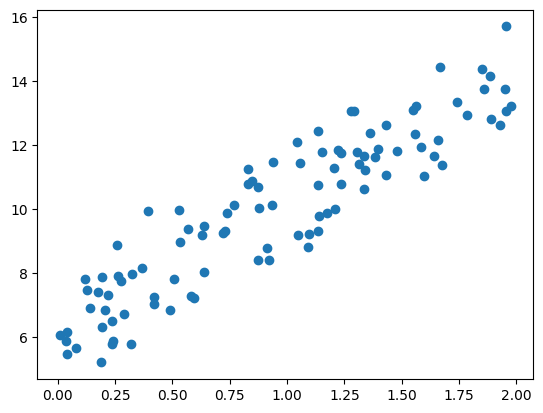

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4x + 6 에 노이즈 추가
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

In [ ]:
#w1 과 w0 를 업데이트할 1_update, wo_update 를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, wo_update 를 각각 w1, w 의 shape 와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    wO_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    # w0_update 를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    # W1 과 w0 을 업데이트할 W1_update 와 wo_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1 과 wO 를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
#wO 와 w 을 모두 0 으로 초기화.
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, wO 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [ ]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0: 3f} w0: {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))


w1:  4.021814 w0: 6.162
Gradient Descent Total Cost: 0.9935


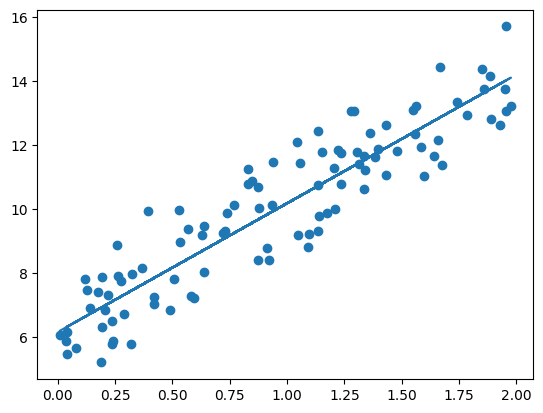

In [ ]:
plt.scatter (X, y)
plt.plot(X, y_pred)

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample X, Sample y 로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, wo_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round (w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print( 'Stochastic Gradient Descent Total Cost: {0: .4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:  0.9937


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
# 다항식으로 변환한 단식 생성 , [[0, 11, [2, 3] 의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처 :1\n', X )
# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures (degree=2)
poly.fit (X)
poly_ftr = poly.transform(X)
print('변환된 2 차 다항식 계수 피처 :\n', poly_ftr)


일차 단항식 계수 피처 :1
 [[0 1]
 [2 3]]
변환된 2 차 다항식 계수 피처 :
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)


일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [ ]:
# 3 차 다항식 변환
from sklearn.linear_model import LinearRegression # Import LinearRegression
poly_ftr = PolynomialFeatures (degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)
# Linear Regression 에 3 차 다항식 계수 feature와 3 차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 In' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :' , model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 In [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y
# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures (degree=3)),
 ('linear', LinearRegression())])
X = np.arange(4).reshape (2,2)
y = polynomial_func(X)
model = model. fit(X, y)
print('Polynomial 회귀 횟수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 횟수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn. linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
# 임의의 값으로 구성된 X 값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos (1.5 * np.pi * X)
# X 는 0 부터 1 까지 30 개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed (0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
#y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.64] 입니다.
Degree 1 MSE = 0.2423 입니다

Degree 4 회귀 계수는 [ 11.04 -30.63  16.71   3.23] 입니다.
Degree 4 MSE = 0.1392 입니다

Degree 15 회귀 계수는 [-2.97665000e+03  1.03910500e+05 -1.87420257e+06  2.03716013e+07
 -1.44873202e+08  7.09315378e+08 -2.47065800e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377529e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE = 181238256.7371 입니다


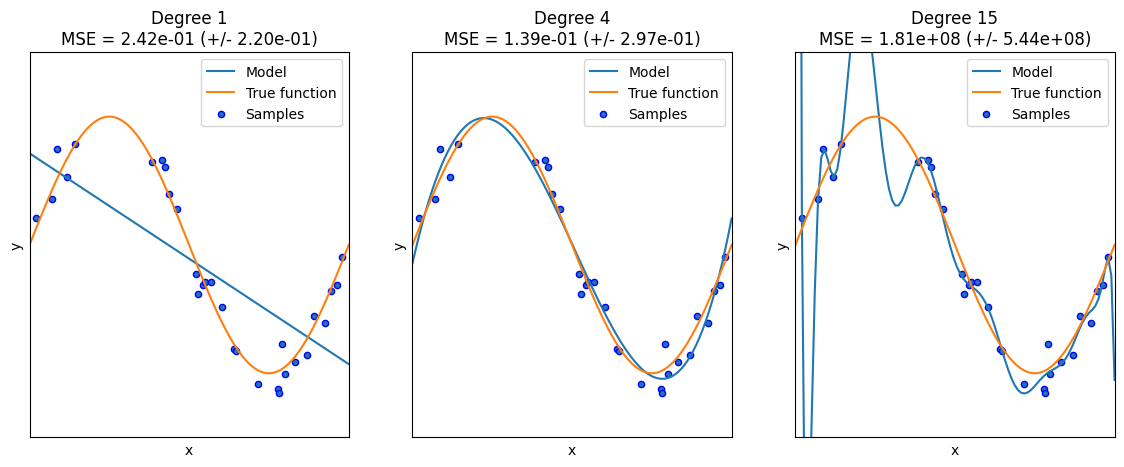

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Example data
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1

# True function for visualization
def true_fun(X):
    return np.sin(2 * np.pi * X)

# Degrees to test
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Build pipeline
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])

    # Fit model
    pipeline.fit(X[:, np.newaxis], y)

    # Cross-validation MSE
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {} 회귀 계수는 {} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {} MSE = {:.4f} 입니다'.format(degrees[i], -np.mean(scores)))

    # Plotting
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), '-', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-1.5, 1.5)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e} (+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()


In [ ]:
# 보스턴 데이터 수동 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 데이터프레임 구성
bostonDF = pd.DataFrame(data, columns=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
])
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


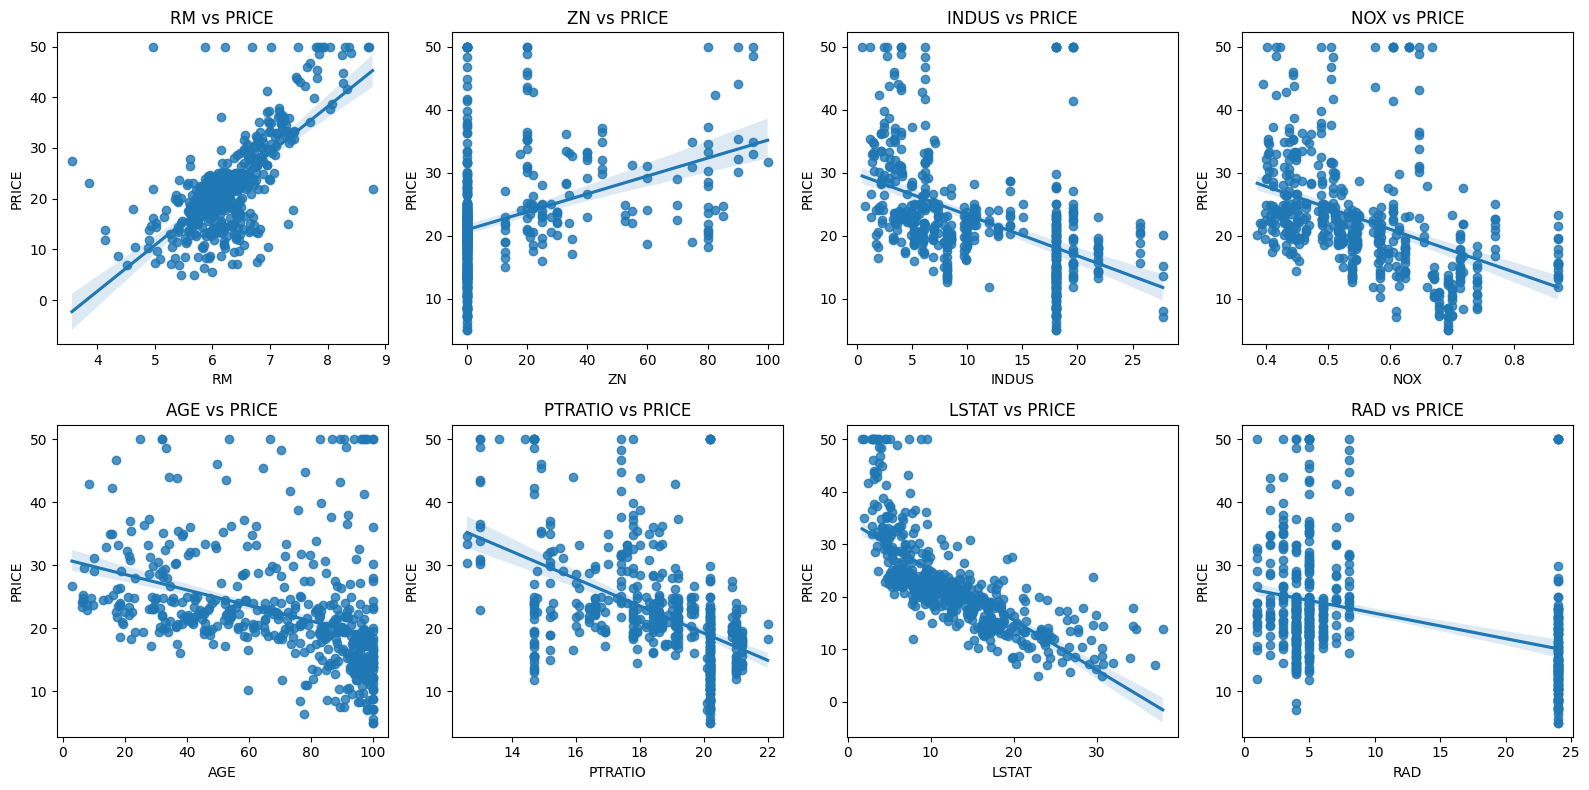

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2x4 서브플롯 생성
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = i // 4  # 행 번호 계산
    col = i % 4   # 열 번호 계산
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])
    axs[row][col].set_title(f'{feature} vs PRICE')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# Correct the assignment order of y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Continue with training the model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수값 :', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn. linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
# 임의의 값으로 구성된 X 값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos (1.5 * np.pi * X)
# X 는 0 부터 1 까지 30 개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed (0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
#y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE = 0.4077
Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE = 0.0432
Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE = 181238256.5642


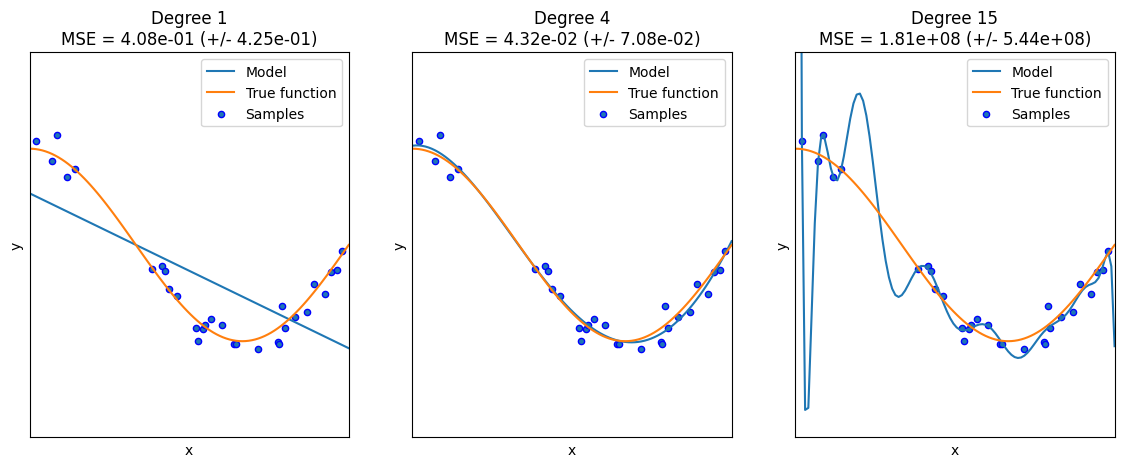

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수를 1, 4, 15로 변화시키며 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree 별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])

    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y,
                             scoring="neg_mean_squared_error", cv=10)

    # 회귀 계수 출력
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('Degree {} 회귀 계수는 {} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {} MSE = {:.4f}'.format(degrees[i], -scores.mean()))

    # 예측 시각화
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), '-', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y")
    plt.xlim((0, 1)); plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e} (+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

plt.show()


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


In [ ]:
from sklearn.model_selection import cross_val_score
y_target = bostonDF ['PRICE']
X_data = bostonDF .drop([ 'PRICE'], axis=1, inplace=False)
lr = LinearRegression()
#Cross_val_score()로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean (rmse_scores)
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별  Negative MSE scores: ', np.round (neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores :' , np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별  Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


# alpha=10 으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518


In [ ]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]
# alphas list 값을 반복하면서 alpha 에 따른 평균 rmse 를 구함.
for alpha in alphas :
    ridge = Ridge (alpha = alpha)

    #cross_val_score를 이용해 5 폴드의 평균 RMSE 를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


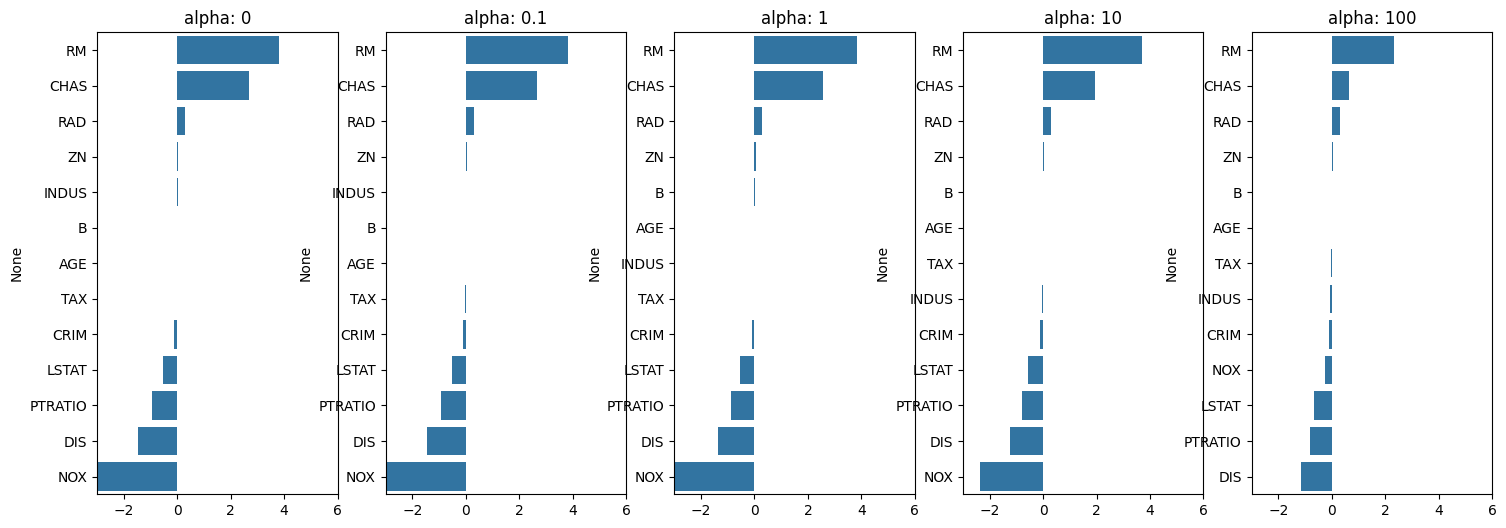

In [ ]:
# 각 alpha 에 따른 회귀 계수 값을 시각화하기 위해 5 개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 Dataframe 생성
coeff_df = pd.DataFrame()
# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos 는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame 의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns )
    colname='alpha: '+str(alpha)
    coeff_df [colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos]. set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
# for 문 바깥에서 맷플롯립의 Show 호출 및 alpha 에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha: '+str(ridge_alphas [0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, _target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()

    if verbose:
        print('#######', model_name, '#######')

    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)

        neg_mse_scores = cross_val_score(model, X_data_n, _target_n,
                                         scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

        print('alpha {}일 때 5 폴드 세트의 평균 RMSE: {:.3f}'.format(param, avg_rmse))

        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n, _target_n)

        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha: ' + str(param)
            coeff_df[colname] = coeff

    return coeff_df


In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval(
    'Lasso',
    params=lasso_alphas,
    X_data_n=X_data,
    _target_n=y_target  # ← 여기 이름 맞춰야 함
)


####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [ ]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha: '+str(lasso_alphas[0])
coeff_lasso_df. sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [ ]:
# ElasticNet에 사용될 alpha 파라미터 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

coeff_elastic_df = get_linear_reg_eval('ElasticNet',
                                       params=elastic_alphas,
                                       X_data_n=X_data, _target_n=y_target)

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [ ]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha: '+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import numpy as np

def get_scaled_data(method='None', P_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if P_degree != None:
        scaled_data = PolynomialFeatures(degree=P_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 스케일링 및 다항식 변환 함수
def get_scaled_data(method='None', P_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if P_degree is not None:
        scaled_data = PolynomialFeatures(degree=P_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

# 회귀 평가 함수
def get_linear_reg_eval(model_name, params, X_data_n, y_target, verbose=True, return_coeff=False):
    results = []

    for alpha in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=alpha)
        else:
            raise ValueError("지원되지 않는 모델입니다.")

        model.fit(X_data_n, y_target)
        pred = model.predict(X_data_n)
        rmse = np.sqrt(mean_squared_error(y_target, pred))

        if verbose:
            print(f'[Model: {model_name}] alpha: {alpha}, RMSE: {rmse:.4f}')

        if return_coeff:
            results.append((alpha, model.coef_))

    if return_coeff:
        return results

# 예시용 데이터 (원래는 X_data, y_target을 정의해야 함)
# 예시로 sklearn의 보스턴 주택 데이터 사용
from sklearn.datasets import load_diabetes
X_data, y_target = load_diabetes(return_X_y=True)

# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 6개 방식으로 변환: 원본, 표준정규, 표준정규+다항식, MinMax, MinMax+다항식, 로그
scale_methods = [
    (None, None),
    ('Standard', None),
    ('Standard', 2),
    ('MinMax', None),
    ('MinMax', 2),
    ('Log', None)
]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], P_degree=scale_method[1],
                                    input_data=X_data)
    print('\n### Method: {}, Polynomial Degree: {}'.format(scale_method[0], scale_method[1]))

    get_linear_reg_eval('Ridge',
                        params=alphas,
                        X_data_n=X_data_scaled,
                        y_target=y_target,
                        verbose=True,
                        return_coeff=False)



### Method: None, Polynomial Degree: None
[Model: Ridge] alpha: 0.1, RMSE: 53.7629
[Model: Ridge] alpha: 1, RMSE: 57.0451
[Model: Ridge] alpha: 10, RMSE: 69.3542
[Model: Ridge] alpha: 100, RMSE: 75.9323

### Method: Standard, Polynomial Degree: None
[Model: Ridge] alpha: 0.1, RMSE: 53.4763
[Model: Ridge] alpha: 1, RMSE: 53.4853
[Model: Ridge] alpha: 10, RMSE: 53.5929
[Model: Ridge] alpha: 100, RMSE: 54.1137

### Method: Standard, Polynomial Degree: 2
[Model: Ridge] alpha: 0.1, RMSE: 49.2687
[Model: Ridge] alpha: 1, RMSE: 49.3518
[Model: Ridge] alpha: 10, RMSE: 49.6766
[Model: Ridge] alpha: 100, RMSE: 50.9834

### Method: MinMax, Polynomial Degree: None
[Model: Ridge] alpha: 0.1, RMSE: 53.5248
[Model: Ridge] alpha: 1, RMSE: 53.6851
[Model: Ridge] alpha: 10, RMSE: 55.6132
[Model: Ridge] alpha: 100, RMSE: 67.1735

### Method: MinMax, Polynomial Degree: 2
[Model: Ridge] alpha: 0.1, RMSE: 50.2371
[Model: Ridge] alpha: 1, RMSE: 51.5601
[Model: Ridge] alpha: 10, RMSE: 53.1177
[Model: Ridge] 

7장

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# StandardScaler()로 평균이 0, 분산 1 로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3,
random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)  # Make sure to train before predict

lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(
    accuracy_score(y_test, lr_preds),
    roc_auc_score(y_test, lr_preds_proba)))

accuracy: 0.977, roc_auc: 0.995


In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
# 여러 개의 Solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf .predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]
    #accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc: {2:.3f}'.format(solver,
    accuracy_score(y_test, lr_preds),
    roc_auc_score(y_test, lr_preds_proba)))

solver:lbfgs, accuracy: 0.977, roc_auc: 0.995
solver:liblinear, accuracy: 0.982, roc_auc: 0.995
solver:newton-cg, accuracy: 0.977, roc_auc: 0.995
solver:sag, accuracy: 0.982, roc_auc: 0.995
solver:saga, accuracy: 0.982, roc_auc: 0.995


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params={'solver':['liblinear', 'lbfgs'],
        'penalty' :['l2', 'l1'],
        'C': [0.01, 0.1, 1, 5, 10]}
lr_clf = LogisticRegression()
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                   grid_clf.best_score_))

최적 하이퍼 파라미터 :{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


# 학습용 데이터 분리
X_data = bostonDF.drop(['PRICE'], axis=1)
y_target = bostonDF['PRICE']

# 랜덤 포레스트 회귀 모델 학습 및 평가
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 결과 출력
print('5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE: {:.3f}'.format(avg_rmse))


5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE: 4.423


In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean (rmse_scores)
    print('#####' , model.__class__.__name__, ' #####') # Changed this line
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}' .format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 정의
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, min_child_samples=5)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

# 모델 평가 루프
for model in models:
    get_model_cv_prediction(model, X_data, y_target)


##### DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423
##### GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269
##### XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.566089
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 405, number of used features: 13
[Light

<Axes: xlabel='None', ylabel='None'>

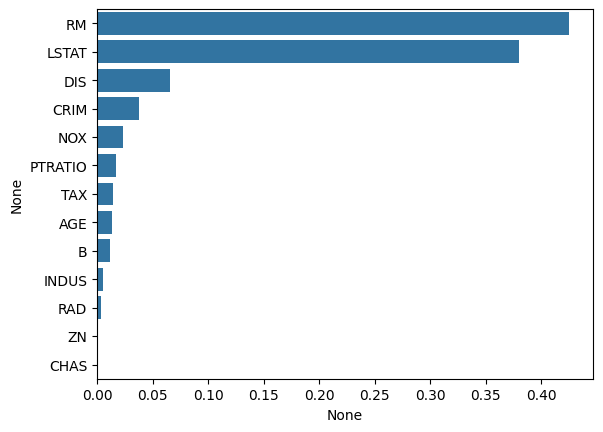

In [ ]:
import seaborn as sns
%matplotlib inline
rf_reg = RandomForestRegressor(n_estimators=1000)
# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data, y_target)
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(506, 2)


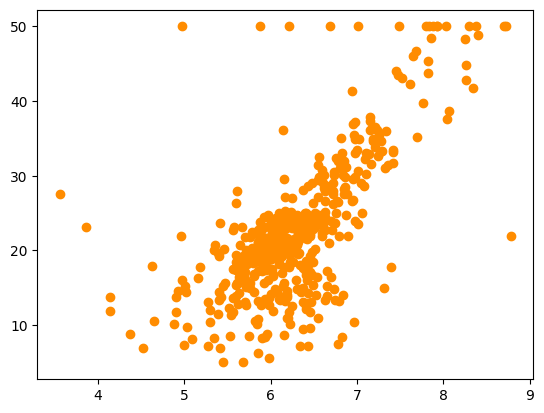

In [ ]:
bostonDF_sample = bostonDF [['RM', 'PRICE']]
bostonD_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor 의 max_depth 는 각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)
# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5 까지의 100 개 데이터 세트로 생성.
X_test = np.arange(4.5, 8.5, 0.04) .reshape(-1, 1)
# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM 만 , 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)
# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)
pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

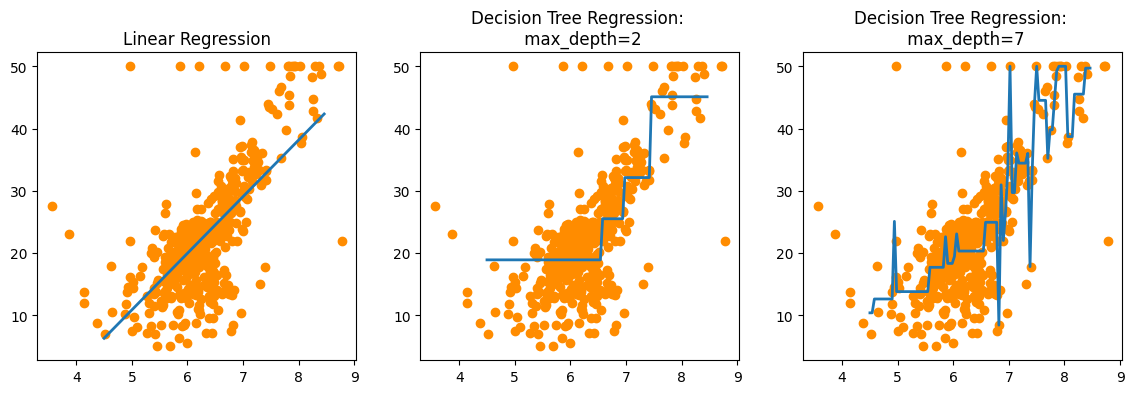

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)
# X 축 값을 4.5 ~ 8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2 )
# DecisionTreeRegressor의 max_depth 를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2' )
ax2.scatter (bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )
# DecisionTreeRegressor의 max_depth를 7 로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)